In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

### Загружаем данные

In [2]:
dfDataBeta = pd.read_pickle('D:/Nerobova_Anastasiya/ML/DataBeta.pkl')
dfTags = pd.read_pickle('D:/Nerobova_Anastasiya/ML/tags_cancer.pkl')

In [3]:
X = dfDataBeta.values
y = dfTags.values

In [4]:
print(X.shape)
print(y.shape)

(8188, 269176)
(8188,)


### Разбиваем данные на обучающую и тестовую выборки

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7, 
                                                    random_state=42,
                                                    stratify=y)
N_test, _ = X_test.shape

In [6]:
del(X)
del(y)

### Обучаем классификатор

In [8]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = (10,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          random_state = 42)

In [9]:
%%time
mlp_model.fit(X_train, y_train)

Wall time: 4min 10s


MLPClassifier(activation='logistic', hidden_layer_sizes=(5,), random_state=42,
              solver='lbfgs')

In [10]:
y_train_pred = mlp_model.predict(X_train)

In [11]:
y_test_pred = mlp_model.predict(X_test)

In [12]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.8907694992147968 0.8909238909238909


In [15]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

precision_score(y_test, y_test_pred, average="macro")

C:\Users\aging\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0060597838375616156

In [16]:
recall_score(y_test, y_test_pred, average="macro")

0.05555555555555555

In [17]:
f1_score(y_test, y_test_pred, average="macro")

0.010927624872579002

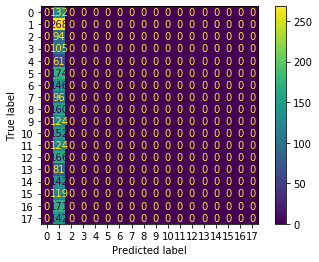

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_test_pred, labels=mlp_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=mlp_model.classes_)
disp.plot()
plt.show()

In [13]:
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

0.17684594348222424 0.1757631822386679


In [25]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = (10,5),
                          solver = 'adam', 
                          activation = 'relu',
                          random_state = 42)

In [13]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

In [8]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(10,10,5),
                        max_iter = 300, activation = 'tanh',
                        solver = 'lbfgs', random_state = 42)


In [9]:
%%time
mlp_model.fit(X_train, y_train)

Wall time: 6min 29s


MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 10, 5), max_iter=300,
              random_state=42, solver='lbfgs')

In [10]:
y_train_pred = mlp_model.predict(X_train)

In [11]:
y_test_pred = mlp_model.predict(X_test)

In [12]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.8907694992147968 0.8909238909238909


In [30]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

precision_score(y_test, y_test_pred, average="macro")

C:\Users\aging\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0060597838375616156

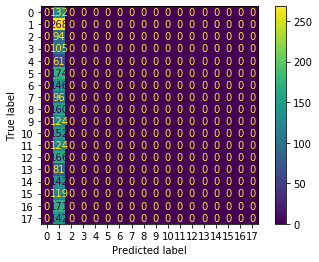

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_test_pred, labels=mlp_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=mlp_model.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (30,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

C:\Users\aging\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
